In [1]:
## Importing the dependencies
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv') 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.drop(['CustomerId','Surname','RowNumber'],axis=1,inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [59]:
df.corr().

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot:>

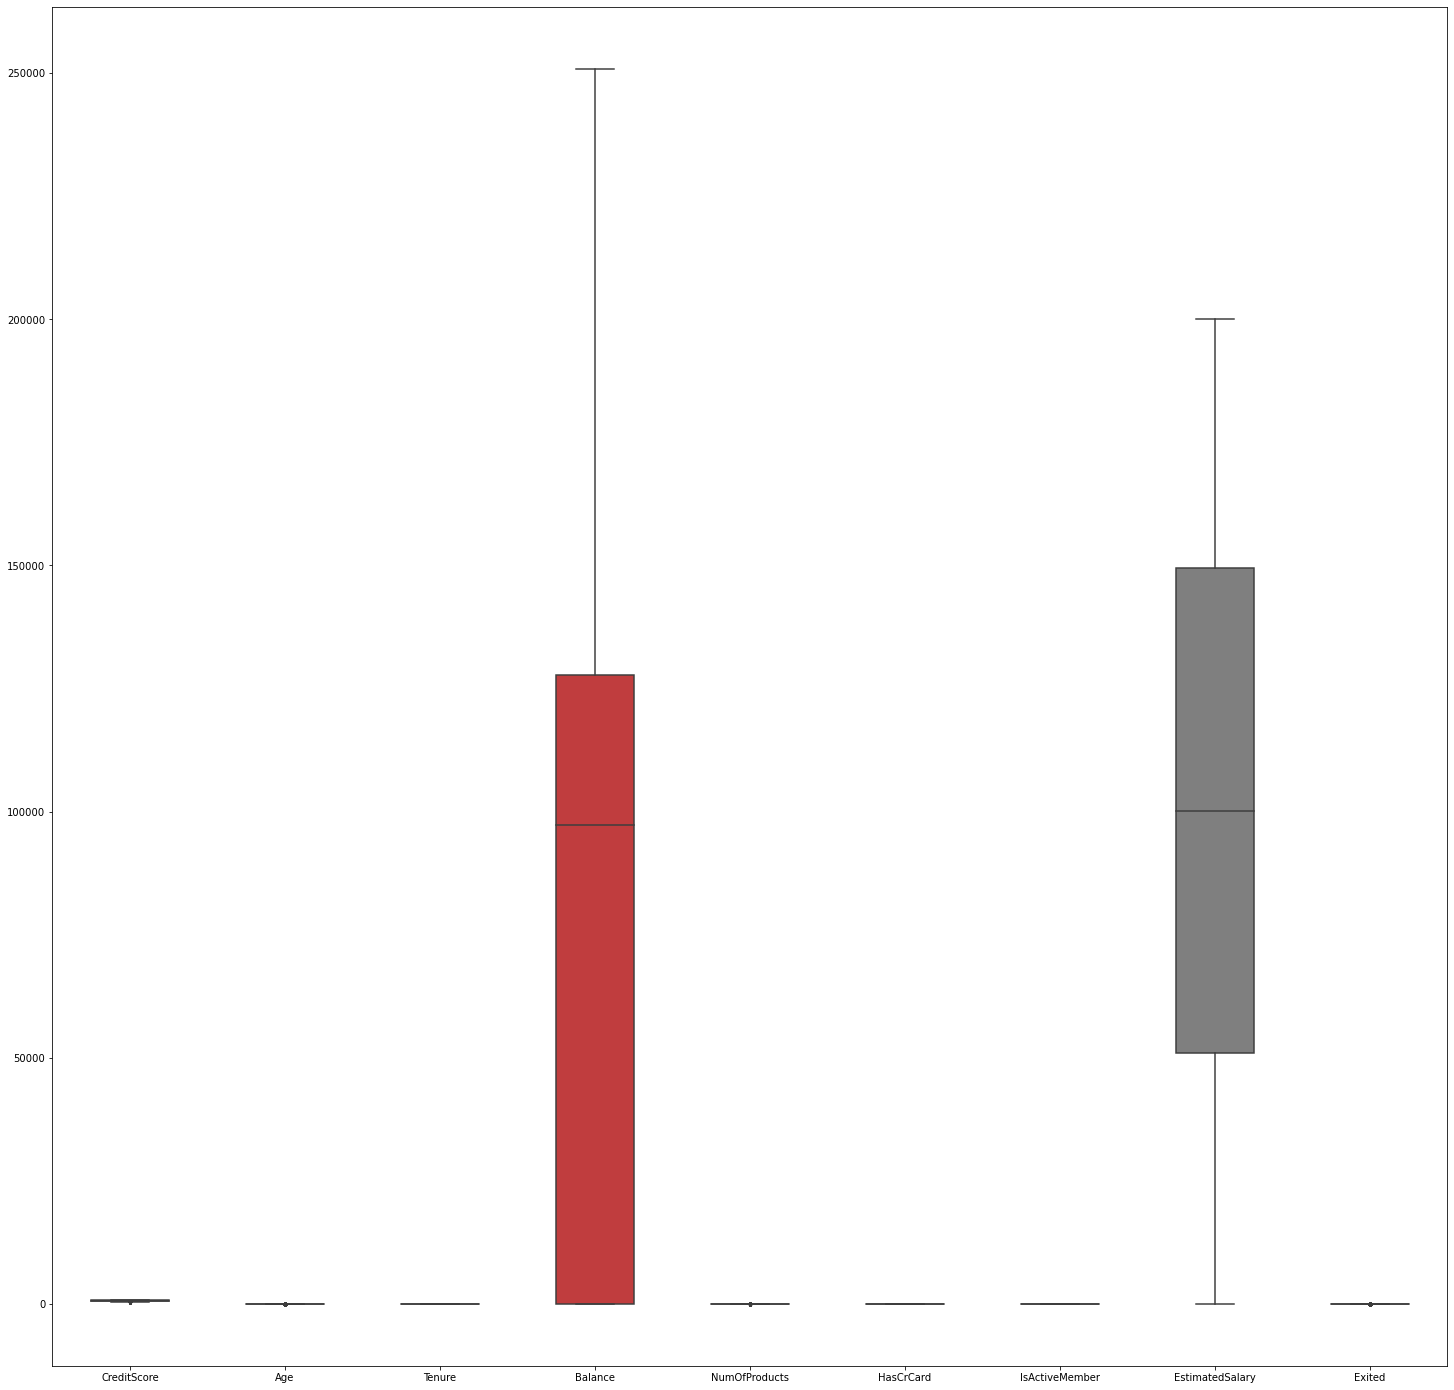

In [6]:
fig, ax = plt.subplots(figsize=(25,25))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df['Geography'] = LabelEncoder().fit_transform(df['Geography'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [13]:
x = df.drop('Exited',axis=1)
y = df['Exited']

In [14]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state= 1,stratify=y)

In [16]:
log_model = LogisticRegression()

log_model.fit(x_train,y_train)

LogisticRegression()

In [17]:
log_model.score(x_train,y_train)

0.789625

In [43]:
## test data

In [18]:
y_pred_test = log_model.predict(x_test)

In [19]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
accuracy_score(y_test,y_pred_test)

0.793

In [21]:
conf_matrix = confusion_matrix(y_test,y_pred_test)
conf_matrix

array([[1564,   29],
       [ 385,   22]], dtype=int64)

In [23]:
true_positive = conf_matrix[0][0]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]
true_negative = conf_matrix[1][1]

In [24]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.793

In [25]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9817953546767106

In [26]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8024628014366342

In [27]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8831168831168831

In [31]:
y_proba = log_model.predict_proba(x_test)
y_proba

array([[0.65089936, 0.34910064],
       [0.72024496, 0.27975504],
       [0.85051566, 0.14948434],
       ...,
       [0.78848141, 0.21151859],
       [0.79741226, 0.20258774],
       [0.73094031, 0.26905969]])

In [33]:
auc = roc_auc_score(y_test, y_proba[:,1])
auc

0.6813469864317322

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])

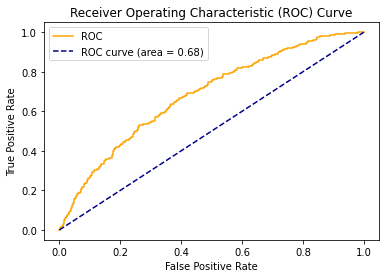

In [35]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Cube Root Transformation

In [36]:
X_cbrt=np.cbrt(x)
X_cbrt

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,8.522432,0.000000,0.0,3.476027,1.259921,0.000000,1.000000,1.0,1.0,46.623655
1,8.471647,1.259921,0.0,3.448217,1.000000,43.761774,1.000000,0.0,1.0,48.280559
2,7.947574,0.000000,0.0,3.476027,2.000000,54.249961,1.442250,1.0,0.0,48.478372
3,8.874810,0.000000,0.0,3.391211,1.000000,0.000000,1.259921,0.0,0.0,45.440389
4,9.472682,1.259921,0.0,3.503398,1.259921,50.068017,1.000000,1.0,1.0,42.923625
...,...,...,...,...,...,...,...,...,...,...
9995,9.169623,0.000000,1.0,3.391211,1.709976,0.000000,1.259921,1.0,0.0,45.831558
9996,8.020779,0.000000,1.0,3.271066,2.154435,38.568016,1.000000,1.0,1.0,46.677400
9997,8.916931,0.000000,0.0,3.301927,1.912931,0.000000,1.000000,0.0,1.0,34.783860
9998,9.173585,1.000000,1.0,3.476027,1.442250,42.185744,1.259921,1.0,0.0,45.288439


In [37]:
dt = pd.concat([X_cbrt,y],axis=1) 
dt.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,8.522432,0.000000,0.0,3.476027,1.259921,0.000000,1.000000,1.0,1.0,46.623655,1
1,8.471647,1.259921,0.0,3.448217,1.000000,43.761774,1.000000,0.0,1.0,48.280559,0
2,7.947574,0.000000,0.0,3.476027,2.000000,54.249961,1.442250,1.0,0.0,48.478372,1
3,8.874810,0.000000,0.0,3.391211,1.000000,0.000000,1.259921,0.0,0.0,45.440389,0
4,9.472682,1.259921,0.0,3.503398,1.259921,50.068017,1.000000,1.0,1.0,42.923625,0


In [38]:
dt.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.009317,-0.002701,-0.006332,-0.001228,0.007063,0.013647,-0.005549,0.026696,-0.003897,-0.029325
Geography,0.009317,1.000000,-0.002607,0.035524,0.002249,0.189666,-0.001838,-0.004801,0.000383,0.001446,0.081417
Gender,-0.002701,-0.002607,1.000000,-0.027629,0.018787,0.007622,-0.017257,0.005766,0.022544,-0.006410,-0.106512
Age,-0.006332,0.035524,-0.027629,1.000000,-0.013612,0.035141,-0.043990,-0.011809,0.071802,-0.002154,0.293408
Tenure,-0.001228,0.002249,0.018787,-0.013612,1.000000,-0.017963,0.024658,0.030012,-0.025760,0.002876,-0.018277
Balance,0.007063,0.189666,0.007622,0.035141,-0.017963,1.000000,-0.349149,-0.017451,-0.006543,0.018668,0.122783
NumOfProducts,0.013647,-0.001838,-0.017257,-0.043990,0.024658,-0.349149,1.000000,0.003504,0.013374,0.011236,-0.089470
HasCrCard,-0.005549,-0.004801,0.005766,-0.011809,0.030012,-0.017451,0.003504,1.000000,-0.011866,-0.005207,-0.007138
IsActiveMember,0.026696,0.000383,0.022544,0.071802,-0.025760,-0.006543,0.013374,-0.011866,1.000000,-0.009780,-0.156128
EstimatedSalary,-0.003897,0.001446,-0.006410,-0.002154,0.002876,0.018668,0.011236,-0.005207,-0.009780,1.000000,0.009953
